This Notebook is divided into three parts; they are:

1. Text vectorization and embedding layer in Keras
2. Writing your own positional encoding layer in Keras
    - Randomly initialized and tunable embeddings
    - Fixed weight embeddings from Attention Is All You Need
3. Graphical view of the output of the positional encoding layer

In [3]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import convert_to_tensor , string
from tensorflow.keras.layers import TextVectorization , Embedding , Layer
from tensorflow.data import Dataset

### 1. The Text Vectorization Layer.

The text vectorization layer creates a dictionary of words and replaces each word with its corresponding index in the dictionary. Let’s see how we can map these two sentences using the text vectorization layer:

- my name is ayush
- i study artificial intelligence 

Note the text has already been converted to lowercase with all the punctuation marks and noise in the text removed. Next, convert these two phrases to vectors of a fixed length 5. The TextVectorization layer of Keras requires a maximum vocabulary size and the required length of an output sequence for initialization. The output of the layer is a tensor of shape:

(number of sentences, output sequence length)

The following code snippet uses the adapt method to generate a vocabulary. It next creates a vectorized representation of the text.

In [4]:
outputSeqLen = 5
vocabSize = 10
sentences = [["my name is ayush"] , ["i study artificial intelligence"]]

# This line creates a TensorFlow Dataset object named sentenceData using the from_tensor_slices method.
# The purpose of using this method is to convert the provided list of sentences into a dataset that can be used
# for further processing, such as training machine learning models.
sentenceData = Dataset.from_tensor_slices(sentences) 

# creating text vectorization layer
vectorizeLayer = TextVectorization(output_sequence_length = outputSeqLen , max_tokens = vocabSize)

# Training the layer to create a dictionary 
vectorizeLayer.adapt(sentenceData)

# converting all sentences to tensors 
wordTensors = convert_to_tensor(sentences , dtype = tf.string)

# using the word tensors to get vectorized phrases 
vectorizedWords = vectorizeLayer(wordTensors)

print("Vocabulary : " , vectorizeLayer.get_vocabulary())
print("\nVectorized Words :" , vectorizedWords)

Vocabulary :  ['', '[UNK]', 'study', 'name', 'my', 'is', 'intelligence', 'i', 'ayush', 'artificial']

Vectorized Words : tf.Tensor(
[[4 3 5 8 0]
 [7 2 9 6 0]], shape=(2, 5), dtype=int64)


### 2. The Embedding Layer.

The Keras Embedding layer converts integers to dense vectors. This layer maps these integers to random numbers, which are later tuned during the training phase. However, we also have the option to set the mapping to some predefined weight values (shown later). To initialize this layer, we need to specify the maximum value of an integer to map, along with the length of the output sequence.

Let’s see how the layer converts the vectorized_text to tensors.

In [5]:
outputLength = 6
wordEmbeddingLayer = Embedding(vocabSize , outputLength)
embeddedWords = wordEmbeddingLayer(vectorizedWords)
print("The Embedded Words are as follows :\n", embeddedWords)

# Note that we will see a different output every time we run this code because the weights have been initialized randomly.

The Embedded Words are as follows :
 tf.Tensor(
[[[ 0.03623316 -0.03049055  0.01760577 -0.01117944  0.01991353
   -0.04550353]
  [-0.01484304 -0.04711086 -0.00454412  0.00280913 -0.00500296
    0.04213369]
  [ 0.04682321 -0.04903673 -0.02791603 -0.00637949  0.00783543
    0.02619317]
  [ 0.03212382 -0.01501326  0.00918679  0.03609912 -0.01141491
    0.0194528 ]
  [ 0.03954008  0.01970471 -0.01246572 -0.00108995  0.04404806
    0.03802338]]

 [[-0.02973796  0.02329489 -0.03470515  0.03506855 -0.0475251
   -0.00203062]
  [ 0.00741304 -0.03497306  0.04071662 -0.02939255 -0.01636327
    0.00608995]
  [ 0.04789971 -0.02574078  0.00072511  0.01744035  0.03316202
    0.01718468]
  [-0.02614764 -0.00364669 -0.03183293  0.02592928 -0.03636318
    0.02270991]
  [ 0.03954008  0.01970471 -0.01246572 -0.00108995  0.04404806
    0.03802338]]], shape=(2, 5, 6), dtype=float32)


### 3. The Position Embeddings.

We also need the embeddings for the corresponding positions. The maximum positions correspond to the output sequence length of the TextVectorization layer.

In [6]:
# rows will correspond to the number of words in the sequence and columns are the size 
# of the vector we use to represent each word in embeddings as the dimension of embedding words and their
# corresponding positional encodings must be same.
positionEmbeddingLayer = Embedding(outputSeqLen , outputLength)

positionIndices = tf.range(outputSeqLen)
embeddedIndices = positionEmbeddingLayer(positionIndices)
print("Positional encodings of a word present at a particular index : \n" , embeddedIndices)


Positional encodings of a word present at a particular index : 
 tf.Tensor(
[[-0.03408666  0.03922086  0.03642798  0.0315556   0.01909515 -0.02476726]
 [-0.01285852 -0.03191769 -0.01176341 -0.01720756 -0.01597228 -0.02747705]
 [-0.00242312  0.00120661  0.01006071 -0.03194707  0.00965135 -0.00927377]
 [-0.03013834 -0.02702286 -0.02693325  0.02160729  0.03591745 -0.02264546]
 [-0.00404797  0.02470967 -0.02782903 -0.03848777 -0.01143639  0.03975911]], shape=(5, 6), dtype=float32)


The Output of Positional Encoding Layer in Transformers :

In a transformer model, the final output is the sum of both the word embeddings and the position embeddings. Hence, when we set up both embedding layers, we need to make sure that the output_length is the same for both.

In [7]:
finalOutputEmbeddings = embeddedWords + embeddedIndices
print("The Final Output Embeddings is as follows :\n", finalOutputEmbeddings)

The Final Output Embeddings is as follows :
 tf.Tensor(
[[[ 2.1465011e-03  8.7303054e-03  5.4033749e-02  2.0376161e-02
    3.9008677e-02 -7.0270792e-02]
  [-2.7701557e-02 -7.9028547e-02 -1.6307522e-02 -1.4398433e-02
   -2.0975243e-02  1.4656642e-02]
  [ 4.4400096e-02 -4.7830116e-02 -1.7855322e-02 -3.8326550e-02
    1.7486777e-02  1.6919401e-02]
  [ 1.9854773e-03 -4.2036116e-02 -1.7746460e-02  5.7706416e-02
    2.4502542e-02 -3.1926632e-03]
  [ 3.5492111e-02  4.4414379e-02 -4.0294744e-02 -3.9577723e-02
    3.2611668e-02  7.7782489e-02]]

 [[-6.3824624e-02  6.2515751e-02  1.7228276e-03  6.6624142e-02
   -2.8429948e-02 -2.6797878e-02]
  [-5.4454803e-03 -6.6890754e-02  2.8953217e-02 -4.6600118e-02
   -3.2335553e-02 -2.1387102e-02]
  [ 4.5476593e-02 -2.4534164e-02  1.0785818e-02 -1.4506713e-02
    4.2813376e-02  7.9109110e-03]
  [-5.6285977e-02 -3.0669557e-02 -5.8766186e-02  4.7536574e-02
   -4.4573471e-04  6.4447522e-05]
  [ 3.5492111e-02  4.4414379e-02 -4.0294744e-02 -3.9577723e-02
    3.

### 4. SubClassing the Keras Embedding Layer.

When implementing a transformer model, we’ll have to write our own position encoding layer. This is quite simple, as the basic functionality is already provided to us. This Keras example shows how we can subclass the Embedding layer to implement our own functionality. We can add more methods to it as we require.

In [8]:
# This line defines a Python class named PositionEmbeddingLayer that inherits from Layer. 
# This class represents a custom layer in TensorFlow that will be used to create position embeddings for a given sequence of words.

class PositionEmbeddingLayer(Layer):
    def __init__(self , sequenceLength , vocabSize , outputDim , **kwargs):
        """
        sequenceLength: The length of the input sequence (number of tokens).
        vocabSize: The size of the vocabulary, which represents the number of unique words in the dataset.
        outputDim: The dimensionality of the embeddings that will be created by this layer.
        **kwargs: This allows additional keyword arguments to be passed.
        
        """
        
        # This line calls the constructor of the parent class (Layer) to initialize the PositionEmbeddingLayer. 
        # It passes the additional keyword arguments to the parent constructor.
        super(PositionEmbeddingLayer , self).__init__(**kwargs)
        
        
        # This line creates an instance of the Embedding layer, which will be used to generate word embeddings.
        # It takes two arguments:
        # input_dim: The size of the vocabulary.
        # output_dim: The dimensionality of the embeddings.
        self.wordEmbeddingLayer = Embedding(input_dim = vocabSize , output_dim = outputDim)
        
        # This line creates another instance of the Embedding layer. 
        # This one will be used to generate position embeddings. It takes two arguments:
        # input_dim: The sequence length, which represents the maximum position index.
        # output_dim: The dimensionality of the embeddings.
        self.positionEmbeddingLayer = Embedding(input_dim = sequenceLength , output_dim = outputDim)
    
    
    # This line defines the call method of the PositionEmbeddingLayer class.
    # This method will be called when the layer is used in a forward pass.
    def call(self , inputs):
        
        # This line uses TensorFlow to generate a range of position indices based on the shape of the input tensor inputs. 
        # It calculates the range based on the last dimension of the input, which represents the sequence length.
        positionIndices = tf.range(tf.shape(inputs)[-1])
        
        # This line uses the previously
        # defined word embedding layer (wordEmbeddingLayer) to generate embeddings for the input sequence inputs.
        embeddedWords = self.wordEmbeddingLayer(inputs)
        
        
        # This line uses the previously defined position embedding layer (position_embedding_layer) to generate embeddings 
        # for the position indices calculated earlier.
        embeddedIndices = self.positionEmbeddingLayer(positionIndices)
        
        
        # This line returns the sum of the word embeddings and position embeddings. 
        # It essentially combines the learned word information with the learned positional 
        # information to create enriched embeddings for each token in the sequence.
        return embeddedWords + embeddedIndices

In [9]:
myEmbeddingLayer = PositionEmbeddingLayer(outputSeqLen, vocabSize, outputLength)
embeddedLayerOutput = myEmbeddingLayer(vectorizedWords)
print("Output from my Embedded Layer is as follows :\n",embeddedLayerOutput)

Output from my Embedded Layer is as follows :
 tf.Tensor(
[[[-0.06633979 -0.0342875   0.02028193  0.00691471 -0.00381466
   -0.02691381]
  [-0.01608818 -0.05337822 -0.03684904  0.08166161  0.00132253
    0.02519841]
  [-0.01567671  0.01684579  0.04967418 -0.04975955  0.0282475
   -0.00511292]
  [-0.04933536  0.04958137 -0.04060271  0.06828935 -0.02551483
    0.02852723]
  [ 0.03191476  0.02613785 -0.01894553  0.0311439  -0.05325713
    0.03783128]]

 [[ 0.01507842 -0.01369772  0.02867294 -0.04790275  0.01552014
   -0.00864646]
  [-0.07841757 -0.06535691 -0.07981122  0.05058669 -0.07753918
    0.01570856]
  [-0.05175852 -0.0574309  -0.02188988  0.00379967  0.01838705
    0.06125653]
  [-0.03428104  0.03455588  0.00610629 -0.00970463  0.01596069
   -0.00964894]
  [ 0.03191476  0.02613785 -0.01894553  0.0311439  -0.05325713
    0.03783128]]], shape=(2, 5, 6), dtype=float32)


### 5. Positional Encoding in Transformers : Attention is all you need.

Note the above class creates an embedding layer that has trainable weights. Hence, the weights are initialized randomly and tuned in to the training phase.

When specifying the Embedding layer, we need to provide the positional encoding matrix as weights along with trainable = False.

In [12]:
class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, sequenceLength, vocabSize, outputDim, **kwargs):
        super(PositionEmbeddingFixedWeights, self).__init__(**kwargs)
        
        # Generating fixed position embedding matrices
        wordEmbeddingMatrix = self.getPositionEmbedding(vocabSize, outputDim)   
        positionEmbeddingMatrix = self.getPositionEmbedding(sequenceLength, outputDim)       
                                           
        # Creating embedding layers with fixed weights
        self.wordEmbeddingLayer = Embedding(
            input_dim=vocabSize, output_dim=outputDim,
            weights=[wordEmbeddingMatrix],
            trainable=False
        )
        self.positionEmbeddingLayer = Embedding(
            input_dim=sequenceLength, output_dim=outputDim,
            weights=[positionEmbeddingMatrix],
            trainable=False
        )
             
    def getPositionEmbedding(self, seqLen, d, n=10000):
        # Generating the fixed position embedding matrix
        posEncoMat = np.zeros((seqLen, d))
        for k in range(seqLen):
            for i in np.arange(int(d / 2)):
                denominator = np.power(n, 2 * i / d)
                posEncoMat[k, 2 * i] = np.sin(k / denominator)
                posEncoMat[k, 2 * i + 1] = np.cos(k / denominator)
        return posEncoMat
 
    def call(self, inputs):        
        # Generating position indices
        positionIndices = tf.range(tf.shape(inputs)[-1])
        
        # Getting word embeddings and position embeddings
        embeddedWords = self.wordEmbeddingLayer(inputs)
        embeddedIndices = self.positionEmbeddingLayer(positionIndices)
        
        # Combining word embeddings and position embeddings
        return embeddedWords + embeddedIndices

In [14]:
# as the weights are not randomly initialized , so unlike previsously learned positional encoding 
# we can run the below code multiple times and we will get the same results as the weight matrices are fixed.

attnIsAllYouNeedEmbedding = PositionEmbeddingFixedWeights(outputSeqLen , vocabSize , outputLength)
attnIsAllYouNeedEmbedding = attnIsAllYouNeedEmbedding(vectorizedWords)
print("Output from Embedded Layer using Sinusoidal Positional Encoding : \n", attnIsAllYouNeedEmbedding)

Output from Embedded Layer using Sinusoidal Positional Encoding : 
 tf.Tensor(
[[[-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]
  [ 0.982591   -0.44969022  0.18519732  1.9892437   0.00861769
    1.9999769 ]
  [-0.04962689 -0.13248464  0.3227002   1.9688845   0.01508082
    1.9999328 ]
  [ 1.1304783  -1.1354926   0.5016505   1.9221673   0.02369788
    1.9998306 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]

 [[ 0.6569866   1.7539022   0.31922466  1.947679    0.01508047
    1.9998863 ]
  [ 1.7507684   0.12415543  0.13909772  1.9946172   0.00646329
    1.9999883 ]
  [ 1.3214159  -1.3272771   0.49839705  1.9097011   0.02369756
    1.9998027 ]
  [-0.13829549 -0.02982223  0.41370738  1.9517908   0.01938951
    1.9998956 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]], shape=(2, 5, 6), dtype=float32)


### 6. Visualizing the Final Embedding.

In order to visualize the embeddings, let’s take two bigger sentences: one technical and the other one just a quote. We’ll set up the TextVectorization layer along with the positional encoding layer and see what the final output looks like.

In [15]:
technicalPhrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
                   
wisePhrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"
 
totalVocabulary = 200 
sequenceLength = 20
finalOutputLen = 50

phraseVectorizationLayer = TextVectorization(
                  output_sequence_length = sequenceLength,
                  max_tokens = totalVocabulary)

# Learning the dictionary
phraseVectorizationLayer.adapt([technicalPhrase, wisePhrase])

# Converting all sentences to tensors
phraseTensors = convert_to_tensor([technicalPhrase, wisePhrase], 
                                   dtype = tf.string)

# Using the word tensors to get vectorized phrases
vectorizedPhrases = phraseVectorizationLayer(phraseTensors)
 
randomWeightsEmbeddingLayer = PositionEmbeddingLayer(sequenceLength, 
                                                        totalVocabulary,
                                                        finalOutputLen)

fixedWeightsEmbeddingLayer = PositionEmbeddingFixedWeights(sequenceLength, 
                                                        totalVocabulary,
                                                        finalOutputLen)

random_embedding = randomWeightsEmbeddingLayer(vectorizedPhrases)

fixed_embedding = fixedWeightsEmbeddingLayer(vectorizedPhrases)

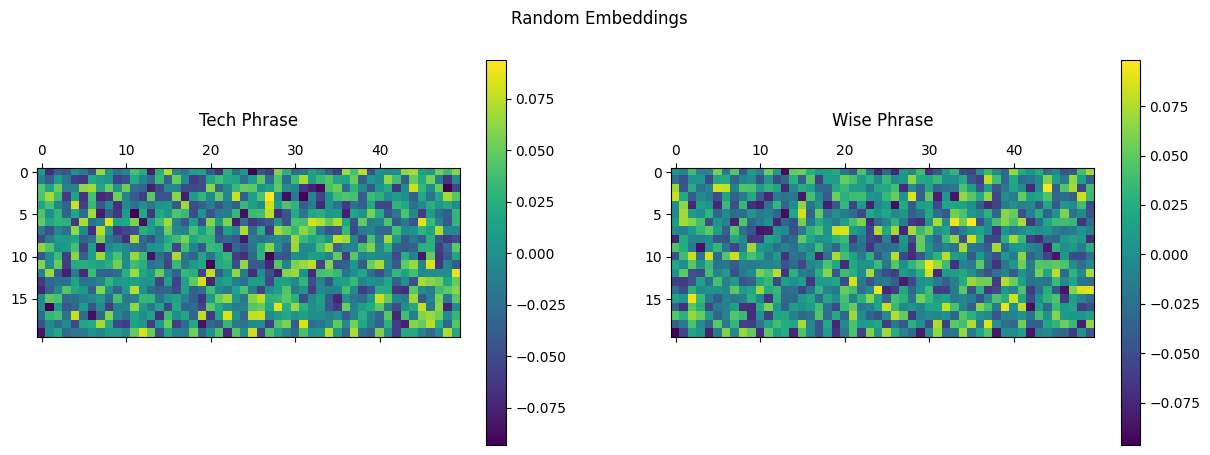

In [18]:
# let's see how the random embeddings looks like for both phrases

fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (sequenceLength, finalOutputLen))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embeddings")
plt.show()

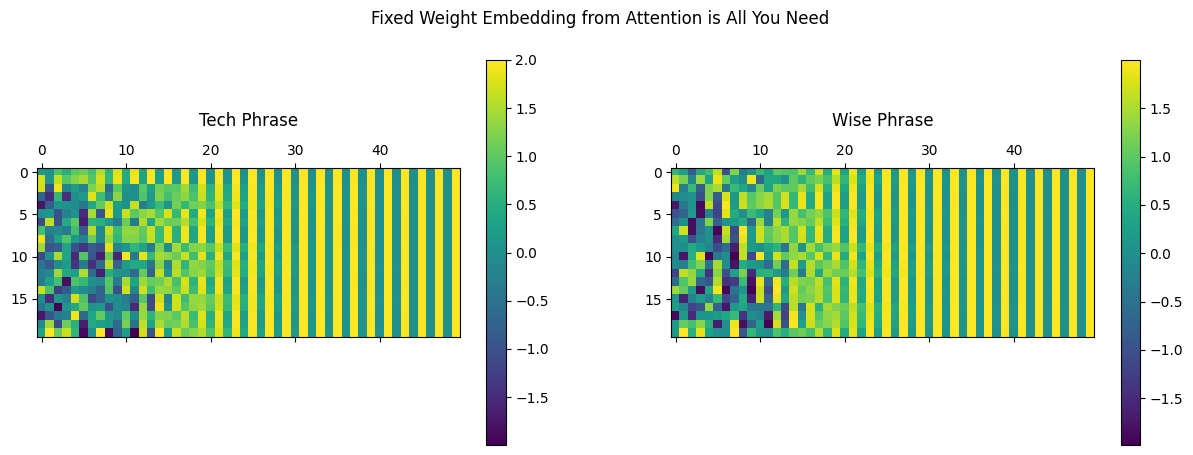

In [19]:
# let's see how the fixed sinusoidal positional embeddings looks like for both phrases

fig = plt.figure(figsize=(15, 5))    
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(fixed_embedding[i, :, :], (sequenceLength, finalOutputLen))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)   
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()

We can see that the embedding layer initialized using the default parameter outputs random values. On the other hand, the fixed weights generated using sinusoids create a unique signature for every phrase with information on each word position encoded within it.

Specifically, we learned:

- Text vectorization layer in Keras
- Positional encoding layer in Keras
- Creating our own class for positional encoding
- Setting our own weights for the positional encoding layer in Keras

References : https://machinelearningmastery.com/the-transformer-positional-encoding-layer-in-keras-part-2/